## 로직스틱 회귀
* 참과 거짓 중 하나를 내놓는 과정은 로지스틱 회귀(logistic regression)의 원리를 거쳐
* 로지스틱 회귀는 선형 회귀와 마찬가지로 적절한 선을 그려 가는 과정입니다. 
* 다만, 직선이 아니라 참(1)과 거짓(0) 사이를 구분하는 S자 형태의 선을 그어 주는 작업
* **시그모이드 함수** 를 이용해 로지스틱 회귀를 풀어 나가는 공식
* 이 식을 통해 알 수 있는 것은 우리가 구해야 하는 값이 여기서도 결국 ax + b라는 것
* a 값이 커지면 경사가 커지고 a 값이 작아지면 경사가 작아집니다.
* b는 그래프의 좌우 이동을 의미
* a 값과 b 값에 따라 오차가 변합
     + a 값이 작아지면 오차는 무한대로 커집니다
     + b 값이 너무 크거나 작을 경우 오차는 이차 함수 그래프와 유사한 형태
* 오차공식
    + 시그모이드 함수의 특징은 y 값이 0과 1 사이라는 것입니다. 
    + 따라서 실제 값이 1일 때 예측 값이 0에 가까워지면 오차가 커집니다. 
    + 반대로 실제 값이 0일 때 예측 값이 1에 가까워지는 경우에도 오차는 커집니다. 
    + 실제 값이 1일 때는 $-logh$ 그래프를 쓰고, 0일 때는 $-log(1-h)$ 그래프를 써야 합니다
    + 실제 값을 y라고 할 때, 이 값이 1이면 B 부분이 없고, 반대로 0이면 A 부분이 없어짐
    + **교차 엔트로피 오차(cross entropy error) 함수**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# 점수가 아니라 오직 합격과 불합격만 발표되는 시험
# 공부한 시간에 따른 합격 여부를 조사

In [4]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

In [5]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [9]:
# 교차 엔트로피 오차 함수를 이용하기 위해 'binary_crossentropy'로 설정합니다.
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x, y, epochs=500, verbose=True)

Epoch 1/500
1/1 [==============================] - 0s 348ms/step - loss: 0.1857 - accuracy: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1857 - accuracy: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1857 - accuracy: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1857 - accuracy: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1856 - accuracy: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1856 - accuracy: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1856 - accuracy: 1.0000
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1856 - accuracy: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1856 - accuracy: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1856 - accuracy: 1.0000
Epoch 11/500
1/1 [=========

1/1 [==============================] - 0s 96ms/step


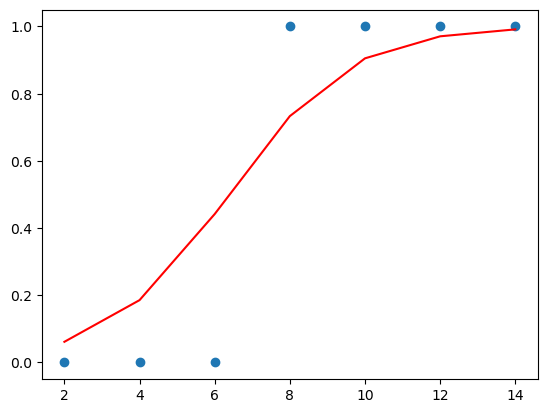

In [7]:
# 그래프로 확인해 봅니다.
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

In [8]:
# 임의의 학습 시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.
hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다." % (hour,
prediction * 100))

1/1 [==============================] - 0s 38ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.6%입니다.
